In [5]:
# =============================================
# SETUP — Importações e Montagem do Drive
# =============================================

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from scipy.stats import chi2_contingency

# Configurações visuais
sns.set_theme(style="whitegrid")
plt.style.use("default")

print("Configuração concluída!")


Mounted at /content/drive
Configuração concluída!


In [6]:
# =============================================
# Carregar os dados já limpos
# =============================================

processed_path = "/content/drive/MyDrive/ESPA5_project/data/processed/"

collisions = pd.read_csv(processed_path + "collisions_cleaned.csv")
ev = pd.read_csv(processed_path + "ev_cleaned.csv")

print("Dados limpos carregados com sucesso!")


/tmp/ipython-input-84877164.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  collisions = pd.read_csv(processed_path + "collisions_cleaned.csv")


Dados limpos carregados com sucesso!


In [7]:
# =============================================
# Estatísticas descritivas (melhoradas)
# =============================================

print("===== ESTATÍSTICAS DESCRITIVAS =====")

# exibe as 10 primeiras linhas da tabela descritiva para não ficar gigante
desc = collisions.describe(include='all').transpose()
display(desc.head(10))

print("\nAs estatísticas acima mostram as principais medidas das variáveis numéricas e categóricas.")


===== ESTATÍSTICAS DESCRITIVAS =====


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
crash_date,2220126,4881,2014-01-21,1161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
crash_time,2220126,1440,2025-11-15 16:00:00,29694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
borough,1539898,5,BROOKLYN,493512,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zip_code,1539623.0,436.0,11207.0,23294.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,1979768.0,NaN,NaN,NaN,40.590071,2.331869,0.0,40.667336,40.720314,40.769558,43.344444
longitude,1979768.0,NaN,NaN,NaN,-73.683672,4.334547,-201.35999,-73.97453,-73.92674,-73.866572,0.0
location,1979768,333790,"(0.0, 0.0)",6505,NaN,NaN,NaN,NaN,NaN,NaN,NaN
on_street_name,1736579,22705,BROADWAY,17277,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cross_street_name,1371787,24809,3 AVENUE,9843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
off_street_name,391173,259294,772 EDGEWATER ROAD,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN



As estatísticas acima mostram as principais medidas das variáveis numéricas e categóricas.


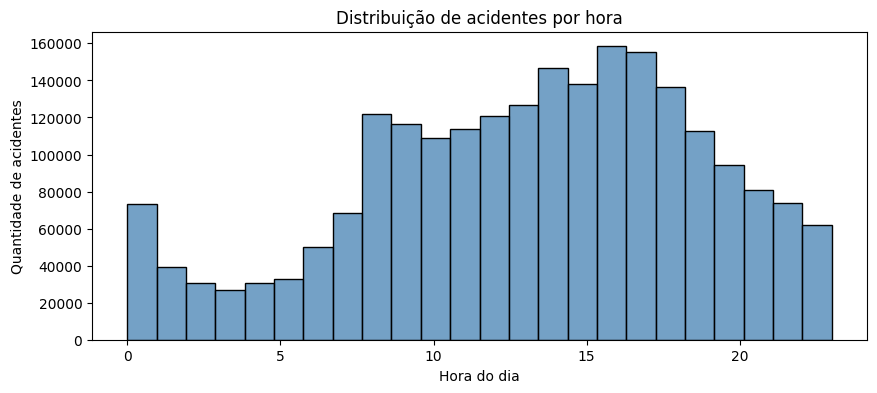

In [8]:
# =============================================
# Análise: Distribuição de acidentes por hora
# =============================================

plt.figure(figsize=(10,4))
sns.histplot(collisions['hour'].dropna(), bins=24, kde=False, color='steelblue')
plt.title("Distribuição de acidentes por hora")
plt.xlabel("Hora do dia")
plt.ylabel("Quantidade de acidentes")
plt.show()


===== Distribuição do número de feridos =====
A maior parte dos acidentes não possui feridos, causando forte assimetria na distribuição.



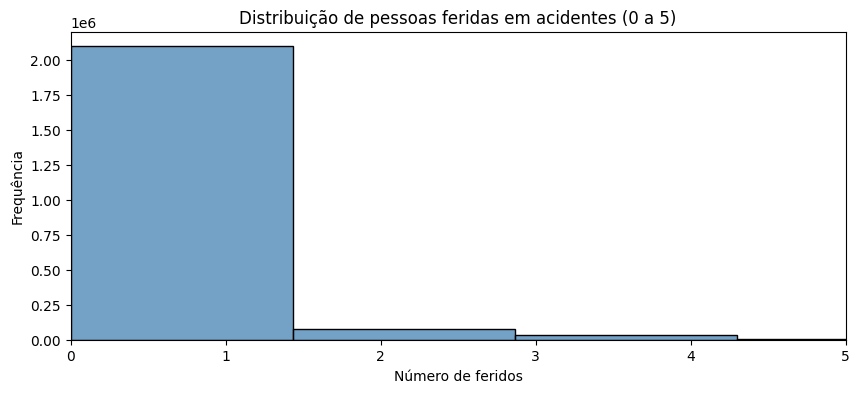

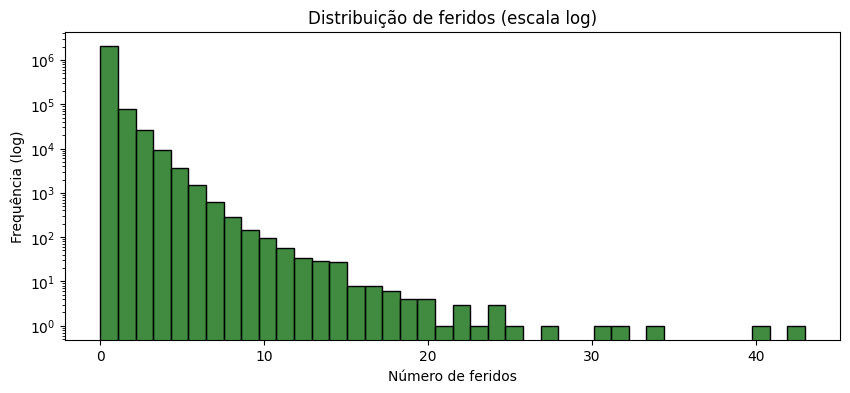

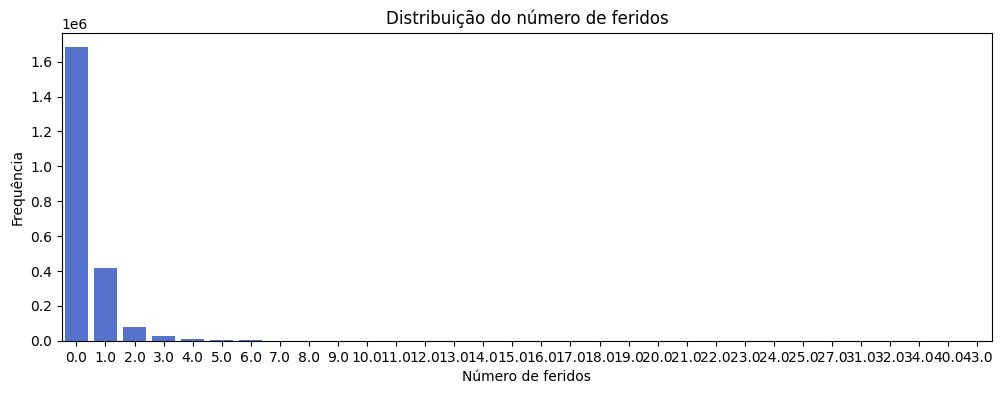

In [9]:
# =============================================
# Distribuição do número de feridos (versões melhoradas)
# =============================================

print("===== Distribuição do número de feridos =====")
print("A maior parte dos acidentes não possui feridos, causando forte assimetria na distribuição.\n")

plt.figure(figsize=(10,4))
sns.histplot(collisions['number_of_persons_injured'], bins=30, color="steelblue")
plt.xlim(0, 5)
plt.title("Distribuição de pessoas feridas em acidentes (0 a 5)")
plt.xlabel("Número de feridos")
plt.ylabel("Frequência")
plt.show()

plt.figure(figsize=(10,4))
sns.histplot(collisions['number_of_persons_injured'], bins=40, color="darkgreen")
plt.yscale("log")
plt.title("Distribuição de feridos (escala log)")
plt.xlabel("Número de feridos")
plt.ylabel("Frequência (log)")
plt.show()

counts = collisions['number_of_persons_injured'].value_counts().sort_index()

plt.figure(figsize=(12,4))
sns.barplot(x=counts.index, y=counts.values, color="royalblue")
plt.title("Distribuição do número de feridos")
plt.xlabel("Número de feridos")
plt.ylabel("Frequência")
plt.show()



/tmp/ipython-input-2597658950.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


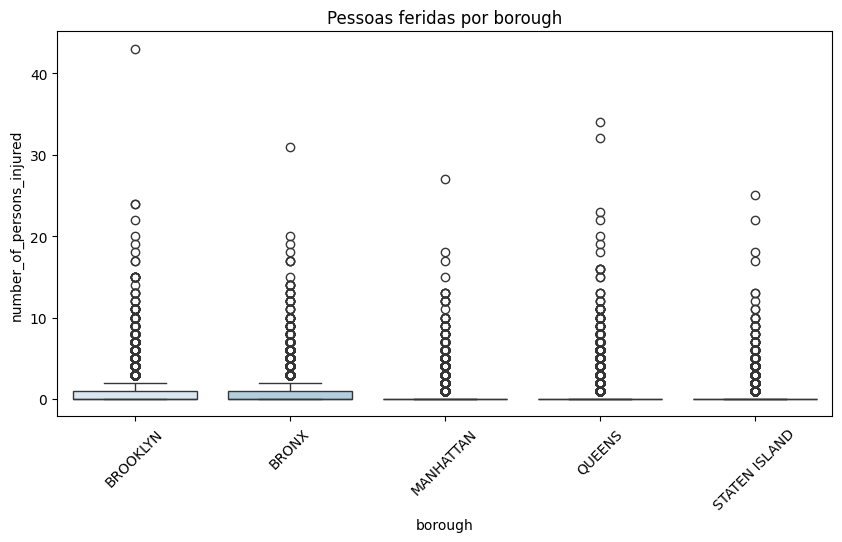

/tmp/ipython-input-2597658950.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=collisions, x="borough", palette="Blues")


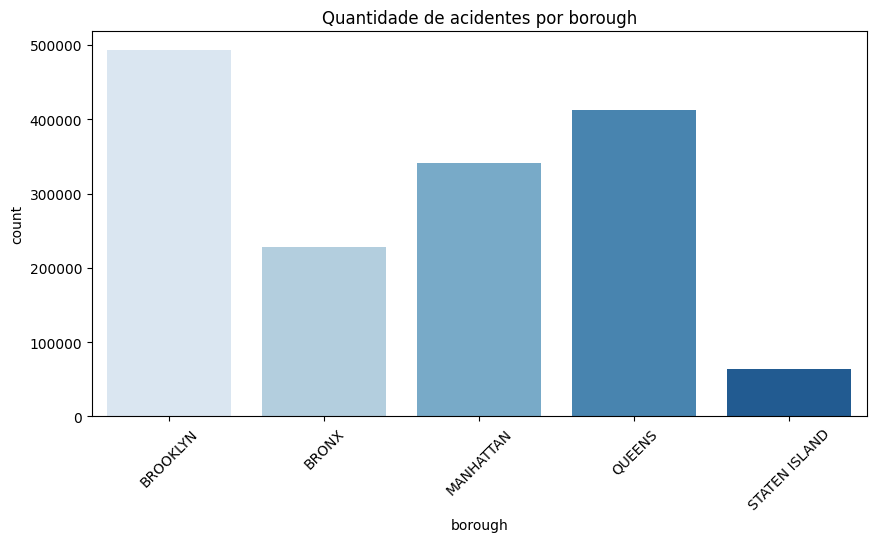

In [11]:
# =============================================
# Boxplot: número de feridos por borough
# =============================================

plt.figure(figsize=(10,5))
sns.boxplot(
    data=collisions,
    x="borough",
    y="number_of_persons_injured",
    palette="Blues"
)
plt.title("Pessoas feridas por borough")
plt.xticks(rotation=45)
plt.show()

# =============================================
# Contagem de acidentes por borough
# =============================================

plt.figure(figsize=(10,5))
sns.countplot(data=collisions, x="borough", palette="Blues")
plt.title("Quantidade de acidentes por borough")
plt.xticks(rotation=45)
plt.show()


In [12]:
# =============================================
# Probabilidade de ocorrência de feridos nos acidentes
# =============================================

collisions["has_injuries"] = collisions["number_of_persons_injured"] > 0

p_injury = collisions["has_injuries"].mean()
print(f"Probabilidade de um acidente ter pessoas feridas: {p_injury:.2%}")

inj_by_borough = collisions.groupby("borough")["has_injuries"].mean()

print("\nProbabilidade de feridos por borough:")
display(inj_by_borough)


Probabilidade de um acidente ter pessoas feridas: 24.23%

Probabilidade de feridos por borough:


,has_injuries
borough,
BRONX,0.254165
BROOKLYN,0.262861
MANHATTAN,0.190631
QUEENS,0.239044
STATEN ISLAND,0.219875


In [14]:
ct = pd.crosstab(
    collisions['borough'],
    collisions['has_injuries']
)

chi2, p, dof, expected = chi2_contingency(ct)

print("===== TESTE QUI-QUADRADO =====")
print("p-value =", p)
print("Se p < 0.05, existe associação estatística entre borough e ocorrência de feridos.")
display(ct)


===== TESTE QUI-QUADRADO =====
p-value = 0.0
Se p < 0.05, existe associação estatística entre borough e ocorrência de feridos.


has_injuries,False,True
borough,,
BRONX,170069,57956
BROOKLYN,363787,129725
MANHATTAN,276210,65056
QUEENS,313987,98635
STATEN ISLAND,50297,14176


In [17]:
# =============================================
# Odds e Odds Ratio por borough
# =============================================

p_inj = collisions['has_injuries'].mean()
p_noinj = 1 - p_inj

odds = p_inj / p_noinj
print(f"Odds geral de ter feridos: {odds:.3f}")

odds_borough = (inj_by_borough / (1 - inj_by_borough)).sort_values(ascending=False)

print("\nODDS por borough:")
display(odds_borough)


Odds geral de ter feridos: 0.320

ODDS por borough:


,has_injuries
borough,
BROOKLYN,0.356596
BRONX,0.340779
QUEENS,0.314137
STATEN ISLAND,0.281846
MANHATTAN,0.235531


In [18]:
print("""
CONCLUSÕES PRELIMINARES DA EDA:

- A distribuição de acidentes por hora indica horários de pico claros.
- Alguns boroughs têm muito mais acidentes do que outros.
- A probabilidade de um acidente resultar em feridos varia bastante entre boroughs.
- O teste qui-quadrado indica se existe associação entre local e ocorrência de feridos.
- Os gráficos ajudam a visualizar essas tendências.
""")



CONCLUSÕES PRELIMINARES DA EDA:

- A distribuição de acidentes por hora indica horários de pico claros.
- Alguns boroughs têm muito mais acidentes do que outros.
- A probabilidade de um acidente resultar em feridos varia bastante entre boroughs.
- O teste qui-quadrado indica se existe associação entre local e ocorrência de feridos.
- Os gráficos ajudam a visualizar essas tendências.

